In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Garbage_Detection/garbage_classification/'
test_dir = '/content/drive/MyDrive/Garbage_Detection/Testing/'

classes=os.listdir('/content/drive/MyDrive/Garbage_Detection/garbage_classification/')

In [ ]:
classes

['metal',
 'cardboard',
 'green-glass',
 'shoes',
 'white-glass',
 'plastic',
 'trash',
 'paper',
 'clothes',
 'biological',
 'brown-glass',
 'battery']

So we have folderwise data classes and seperation between them as Test and train data

test_train_distribution() gives the distribution

In [ ]:
train_count = []
train_dict={}
test_count = []
test_dict ={}
# avg_of_train_data=0
# avg_of_test_data=0

def test_train_distribution():
  print("Train Set :")

  for folder in os.listdir(train_dir) :
      # print(folder, "folder contains:", len(os.listdir(train_dir+folder)), "image")
      train_count.append(len(os.listdir(train_dir+folder)))
      train_dict[folder]=len(os.listdir(train_dir+folder))
  avg_of_train_data=sum(train_count)/len(train_count)
  print(train_dict)
  print("Avgerage dataset len should be ~",round(avg_of_train_data))    
  print()

  #####################test##################

  
  print("Test Set :")
  


  for folder in os.listdir(test_dir) :
      # print(folder, "folder contains:", len(os.listdir(test_dir+folder)), "images")
      test_count.append(len(os.listdir(test_dir+folder)))
      test_dict[folder]=len(os.listdir(test_dir+folder))
  avg_of_test_data=sum(test_count)/len(test_count)

  print(test_dict)
test_train_distribution()

Train Set :
{'metal': 769, 'cardboard': 891, 'green-glass': 629, 'shoes': 1977, 'white-glass': 775, 'plastic': 865, 'trash': 697, 'paper': 1050, 'clothes': 5325, 'biological': 985, 'brown-glass': 607, 'battery': 945}
Avgerage dataset len should be ~ 1293

Test Set :
{'cardboard': 147, 'trash': 141, 'paper': 250, 'brown_glass': 147, 'white_glass': 199, 'metal': 150, 'plastic': 133, 'clothes': 195, 'green_glass': 101, 'shoes': 252, 'battery': 201, 'biological': 241}


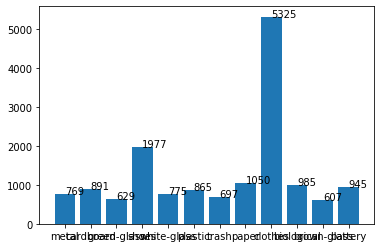

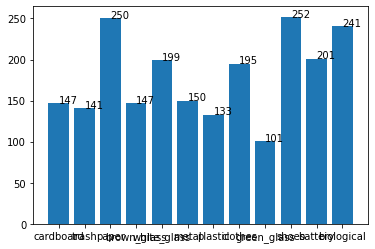

In [ ]:
def plot_data_dist(dictn):
  def addlabels(x,y):
      for i in range(len(x)):
          plt.text(i,y[i],y[i])


  names = list(dictn.keys())
  values = list(dictn.values())
  addlabels(names,values)

  plt.bar(range(len(dictn)), values, tick_label=names)
  plt.show()

plot_data_dist(train_dict)
plot_data_dist(test_dict)

In [ ]:
#averages of train test sets
avg_of_train_data=round(sum(train_count)/len(train_count))
avg_of_test_data=round(sum(test_count)/len(test_count))

In [ ]:
#average of test train
avg_of_train_data,avg_of_test_data

(1293, 180)

Data Augmentation

Upsampling images to average value of dataset

In [ ]:
def upsample_to_Average(avg_value,path):
  print("working on upsampling :",path,"with : ",avg_value,"avg value")
  """
  provided path of train and test dir 
  and average of total classes 
  upsamples data to average 
  run once !!!!!!!
  """
  import shutil
  from keras.preprocessing.image import ImageDataGenerator
  for dir in os.listdir(path):
    # print(len(os.listdir(path+"/"+dir)))
    if (len(os.listdir(path+"/"+dir))) < avg_value :
      upsample=avg_value-(len(os.listdir(path+"/"+dir)))

      print(dir,"below average by ",upsample," Now Upsampling !!!")
      
      shutil.copytree(path+"/"+dir, "/content/augmentation_Dump/"+dir)

      datagen = ImageDataGenerator(
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range = 0.2,
      zoom_range = 0.2, 
      horizontal_flip=True,
      fill_mode = 'reflect', cval = 125)
      i = 0
      breaker=round(upsample/32)
      # print(breaker)

      augmentation_Dump_dir="/content/augmentation_Dump"
      target_dir=path+"/"+dir+"/"
      # print(target_dir,augmentation_Dump_dir)
      for batch in datagen.flow_from_directory(augmentation_Dump_dir,
                                          batch_size = 64,
                                          target_size = (224, 224),
                                          save_to_dir = target_dir,
                                          save_prefix = 'aug',
                                          save_format = 'jpg',
                                          class_mode=None):
        
        i += 1
        if i > breaker:
          shutil.rmtree("/content/augmentation_Dump")
          break


#train data upsampling
upsample_to_Average(avg_of_train_data,"/content/drive/MyDrive/Garbage_Detection/garbage_classification/")

working on upsampling : /content/drive/MyDrive/Garbage_Detection/garbage_classification/ with :  1293 avg value


In [ ]:
test_train_distribution()

Train Set :
{'metal': 1626, 'cardboard': 1626, 'green-glass': 1626, 'shoes': 1626, 'white-glass': 1626, 'plastic': 1626, 'trash': 1626, 'paper': 1626, 'clothes': 1626, 'biological': 1626, 'brown-glass': 1626, 'battery': 1626}
Avgerage dataset len should be ~ 1657

Test Set :
{'cardboard': 147, 'trash': 141, 'paper': 250, 'brown_glass': 147, 'white_glass': 199, 'metal': 150, 'plastic': 133, 'clothes': 195, 'green_glass': 101, 'shoes': 252, 'battery': 201, 'biological': 241}


Downsampling

In [ ]:
def downsample_to_Average(path):
  
  """
  provided path of train and test dir 
  and average of total classes 
  down data to min of them usin RANDOM
  run once !!!!!!!
  """
  from random import sample
  dirct=os.listdir(path)

  lenghts=[]


  for dir in dirct:
    lenth=len(os.listdir(path+'/'+dir))
    lenghts.append(lenth)
  min(lenghts)
  print("working on downsampling on path :",path,"with : ",min(lenghts),"as min value")
  for dir in dirct:
    lenth=len(os.listdir(path+'/'+dir))
    if lenth>min(lenghts):
      files_no=lenth-min(lenghts)
      files = os.listdir(path+'/'+dir)
      for file in sample(files,files_no):
        os.remove(path+'/'+dir+"/"+file)

downsample_to_Average("/content/drive/MyDrive/Garbage_Detection/garbage_classification/")

working on downsampling on path : /content/drive/MyDrive/Garbage_Detection/garbage_classification/ with :  1626 as min value


In [ ]:
test_train_distribution()

Train Set :
{'metal': 1626, 'cardboard': 1626, 'green-glass': 1626, 'shoes': 1626, 'white-glass': 1626, 'plastic': 1626, 'trash': 1626, 'paper': 1626, 'clothes': 1626, 'biological': 1626, 'brown-glass': 1626, 'battery': 1626}
Avgerage dataset len should be ~ 1652

Test Set :
{'cardboard': 147, 'trash': 141, 'paper': 250, 'brown_glass': 147, 'white_glass': 199, 'metal': 150, 'plastic': 133, 'clothes': 195, 'green_glass': 101, 'shoes': 252, 'battery': 201, 'biological': 241}


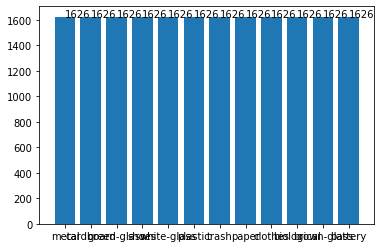

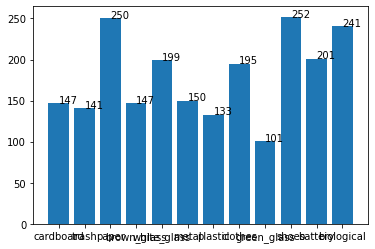

In [ ]:
def plot_data_dist(dictn):
  def addlabels(x,y):
      for i in range(len(x)):
          plt.text(i,y[i],y[i])


  names = list(dictn.keys())
  values = list(dictn.values())
  addlabels(names,values)

  plt.bar(range(len(dictn)), values, tick_label=names)
  plt.show()

plot_data_dist(train_dict)
plot_data_dist(test_dict)